In this project, we utilized the [fake news dataset](https://www.kaggle.com/c/fake-news/data) from Kaggle to classify unreliable news articles as fake news. The training dataset consists of the following characteristics:

**id:** unique id for a news article

**title:** title of a news article

**author:** author of the news article

**text:** text of the article

**label:** a label that marks the article as unreliable denoted by 1 (unreliable or fake) or 0 (reliable or real)


In [1]:
import pandas as pd

df_train=pd.read_csv(r'data/train.csv', skipinitialspace=True)
df_test=pd.read_csv(r'data/test.csv', skipinitialspace=True)
# exclude rows where text column is NaN
df_train.dropna(axis=0, how="any", thresh=None, subset=['text'], inplace=True)
df_test = df_test.fillna(' ')

# get data information
print('Training dataset shape:', df_train.shape)
print('Training dataset columns:', df_train.columns)
print('Training dataset head:', '\n', df_train.head(), '\n')
print('Test dataset shape:', df_test.shape)
print('Test dataset columns:', df_test.columns)
print('Test dataset head:', '\n', df_test.head())

Training dataset shape: (20685, 5)
Training dataset columns: Index(['id', 'title', 'author', 'text', 'label'], dtype='object')
Training dataset head: 
    id                                              title              author  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3   3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4   4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   

                                                text  label  
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1  
1  Ever get the feeling your life circles the rou...      0  
2  Why the Truth Might Get You Fired October 29, ...      1  
3  Videos 15 Civilians Killed In Single US Airstr...      1  
4  Print \r\nAn Iranian woman has been sentenced ...     

1: Fake
0: Real
Distribution of labels:
0    10387
1    10298
Name: label, dtype: int64
0    50.0
1    50.0
Name: label, dtype: float64


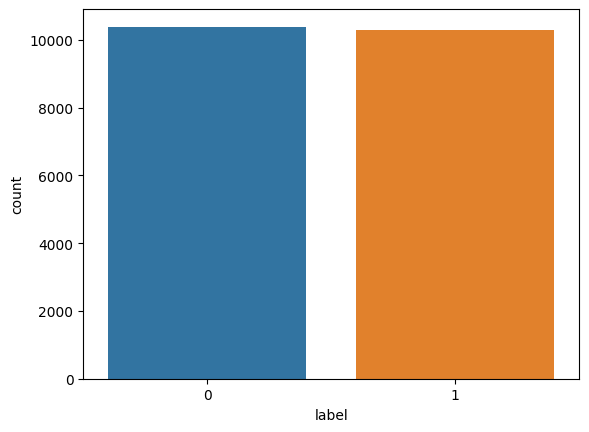

In [2]:
import seaborn as sn

# plot distribution of classes
sn.countplot(x='label', data=df_train)
print('1: Fake')
print('0: Real')
print('Distribution of labels:')
print(df_train.label.value_counts())
print(round(df_train.label.value_counts(normalize=True),2)*100)

In [3]:
# text word statistics
txt_length = df_train.text.str.split().str.len()
txt_length.describe()

count    20685.000000
mean       763.101620
std        869.897521
min          0.000000
25%        272.000000
50%        559.000000
75%       1054.000000
max      24234.000000
Name: text, dtype: float64

### Text preprocessing with nltk
* Text cleaning
* Lowercasing
* Tokenization
* Remove stopwords
* Lemmatization

In [4]:
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# lowercasing
df_train['text']=df_train['text'].str.lower()
# remove punctuation
df_train['text'] = df_train['text'].str.replace(r'[^\w\s]+', '', regex=True)

# remove extra whitespaces
def remove_whitespace(text):
    return  " ".join(text.split())

df_train['text'] = df_train['text'].apply(remove_whitespace)

# tokenization
df_train['text']=df_train['text'].apply(lambda x: word_tokenize(x))
# remove frequently used words
stopwords = stopwords.words('english')
df_train['text'] = df_train['text'].apply(lambda words: [word for word in words if word not in stopwords])
# lemmatization
lemmatizer = WordNetLemmatizer()
df_train['text'] = df_train['text'].apply(lambda lst: [lemmatizer.lemmatize(word) for word in lst])

df_train['text'].head()

0    [house, dem, aide, didnt, even, see, comeys, l...
1    [ever, get, feeling, life, circle, roundabout,...
2    [truth, might, get, fired, october, 29, 2016, ...
3    [video, 15, civilian, killed, single, u, airst...
4    [print, iranian, woman, sentenced, six, year, ...
Name: text, dtype: object

In [5]:
from sklearn.model_selection import train_test_split

df_train_labels = df_train['label']
# split data into training and test sets
x_train, x_test, y_train, y_test=train_test_split(df_train['text'].astype(str), df_train_labels, test_size=0.2, random_state=7)

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

# set up Term Frequency-Inverse Document Frequency Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.8)

# fit and transform training dataset and transform test dataset
tfidf_train = tfidf_vectorizer.fit_transform(x_train)
tfidf_test = tfidf_vectorizer.transform(x_test)

Passive Aggressive Classifier Accuracy: 96.04 % 



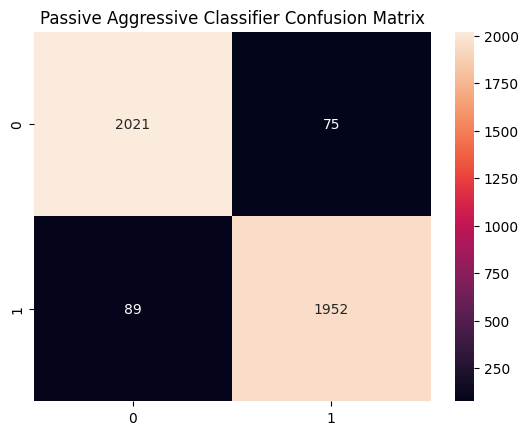

Passive Aggressive Classifier classification report: 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      2096
           1       0.96      0.96      0.96      2041

    accuracy                           0.96      4137
   macro avg       0.96      0.96      0.96      4137
weighted avg       0.96      0.96      0.96      4137



In [7]:
import matplotlib.pyplot as plt
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# initialize a PassiveAggressiveClassifier
clf = PassiveAggressiveClassifier(max_iter=1000, early_stopping=True)
# fit on training dataset
clf.fit(tfidf_train, y_train)
# predict on test dataset
y_pred = clf.predict(tfidf_test)
score = accuracy_score(y_test, y_pred)
print('Passive Aggressive Classifier Accuracy:', round(score * 100, 2), '%', '\n')

# confusion matrix with columns as True Positive, False Negative, False Positive and True Negative 
conf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])
df_conf_matrix = pd.DataFrame(conf_matrix)
sn.heatmap(df_conf_matrix, annot=True, fmt='d').set_title('Passive Aggressive Classifier Confusion Matrix')
plt.show()

# classification report
print('Passive Aggressive Classifier classification report: \n', classification_report(y_test, y_pred))

Naive Bayes Classifier Accuracy: 83.18 % 



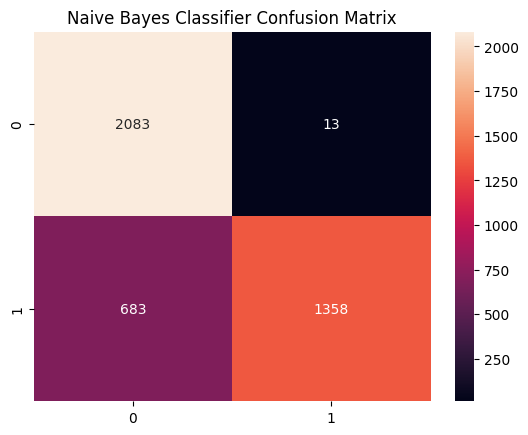

Naive Bayes Classifier classification report: 
               precision    recall  f1-score   support

           0       0.75      0.99      0.86      2096
           1       0.99      0.67      0.80      2041

    accuracy                           0.83      4137
   macro avg       0.87      0.83      0.83      4137
weighted avg       0.87      0.83      0.83      4137



In [8]:
from sklearn.naive_bayes import MultinomialNB

# initialize a Naive Bayes classifier
clf = MultinomialNB()
# fit on training dataset
clf.fit(tfidf_train, y_train)
# predict on test dataset
y_pred = clf.predict(tfidf_test)
score = accuracy_score(y_test, y_pred)
print('Naive Bayes Classifier Accuracy:', round(score * 100, 2), '%', '\n')

# confusion matrix with columns as True Positive, False Negative, False Positive and True Negative 
conf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])
df_conf_matrix = pd.DataFrame(conf_matrix)
sn.heatmap(df_conf_matrix, annot=True, fmt='d').set_title('Naive Bayes Classifier Confusion Matrix')
plt.show()

# classification report
print('Naive Bayes Classifier classification report: \n', classification_report(y_test, y_pred))

Best SVM parameters after tuning: {'C': 1, 'gamma': 1, 'kernel': 'linear'}
SVM Accuracy: 96.4 % 



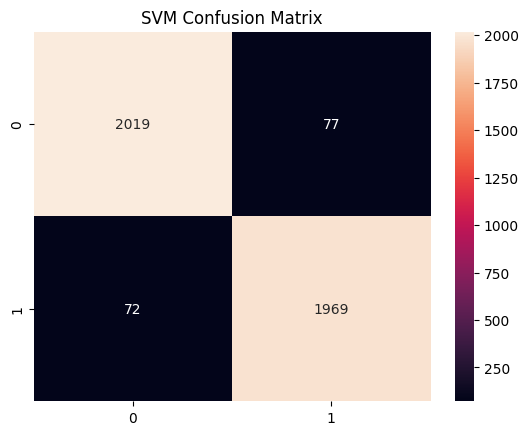

SVM classification report: 
               precision    recall  f1-score   support

           0       0.97      0.96      0.96      2096
           1       0.96      0.96      0.96      2041

    accuracy                           0.96      4137
   macro avg       0.96      0.96      0.96      4137
weighted avg       0.96      0.96      0.96      4137



In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# initialize an SVM and define parameter range for tuning
param_grid = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01], 'kernel': ['linear']}
grid = GridSearchCV(SVC(), param_grid, refit=True)
# fit the model for grid search
grid.fit(tfidf_train, y_train)
print('Best SVM parameters after tuning:', grid.best_params_, '\n')
# predict on test dataset
y_pred = grid.predict(tfidf_test)
score = accuracy_score(y_test, y_pred)
print('SVM Accuracy:', round(score * 100, 2), '%', '\n')

# confusion matrix with columns as True Positive, False Negative, False Positive and True Negative 
conf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])
df_conf_matrix = pd.DataFrame(conf_matrix)
sn.heatmap(df_conf_matrix, annot=True, fmt='d').set_title('SVM Confusion Matrix')
plt.show()

# classification report
print('SVM classification report: \n', classification_report(y_test, y_pred))